# Time Series Analysis and Forecasting

## Import Relevant Packages

In [36]:
# stop printing warnings
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

# data structures and data analysis tools
import pandas as pd

# scientific computing
import numpy as np
from numpy import log

# operating system
import os

# visualisation
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.cm
import geopandas as gpd
import seaborn as sns
color = sns.color_palette()

# default matplotlib plotting style
plt.style.use('ggplot')

# time series forecasting
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

# assessment metrics
from sklearn.metrics import mean_squared_error

# read in data from sources such as Google, World Bank
import pandas_datareader as pdr

# get data from Google Finance
import quandl

# dates
import datetime

In [8]:
# set options
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_row', 30)

# display multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Read File

In [9]:
# get the current working directory
os.getcwd()

'/Users/manuelsteiner/Documents/Time_Series/Script'

In [10]:
# import data from Google finance, for example "Google"
google = quandl.get("WIKI/GOOGL", 
                  start_date = "2015-01-01", 
                  end_date = "2019-05-01")

In [11]:
# first 5 rows
google.head()

# last 5 rows
google.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2015-01-02,532.60,535.8000,527.88,529.55,1327870.0,0.0,1.0,532.60,535.8000,527.88,529.55,1327870.0
2015-01-05,527.15,527.9899,517.75,519.46,2059119.0,0.0,1.0,527.15,527.9899,517.75,519.46,2059119.0
2015-01-06,520.50,521.2100,505.55,506.64,2731813.0,0.0,1.0,520.50,521.2100,505.55,506.64,2731813.0
2015-01-07,510.95,511.4900,503.65,505.15,2345875.0,0.0,1.0,510.95,511.4900,503.65,505.15,2345875.0
2015-01-08,501.51,507.5000,495.02,506.91,3662224.0,0.0,1.0,501.51,507.5000,495.02,506.91,3662224.0


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,1092.57,1108.70,1087.21,1094.00,1990515.0,0.0,1.0,1092.57,1108.70,1087.21,1094.00,1990515.0
2018-03-22,1080.01,1083.92,1049.64,1053.15,3418154.0,0.0,1.0,1080.01,1083.92,1049.64,1053.15,3418154.0
2018-03-23,1051.37,1066.78,1024.87,1026.55,2413517.0,0.0,1.0,1051.37,1066.78,1024.87,1026.55,2413517.0
2018-03-26,1050.60,1059.27,1010.58,1054.09,3272409.0,0.0,1.0,1050.60,1059.27,1010.58,1054.09,3272409.0
2018-03-27,1063.90,1064.54,997.62,1006.94,2940957.0,0.0,1.0,1063.90,1064.54,997.62,1006.94,2940957.0


In [12]:
# in case the API has changed, save to csv and read it again
google.to_csv('/Users/manuelsteiner/Documents/Time_Series/Data/google.csv')

# read as df
google = pd.read_csv('/Users/manuelsteiner/Documents/Time_Series/Data/google.csv', 
                     header = 0, 
                     index_col = 'Date', 
                     parse_dates = True)


## Descriptive Statistics

In [13]:
# index
google.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name='Date', length=813, freq=None)

In [14]:
# columns
google.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

In [15]:
# descriptive statistics
google.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,813.000000,813.000000,813.000000,813.000000,8.130000e+02,813.0,813.0,813.000000,813.000000,813.000000,813.000000,8.130000e+02
mean,798.454314,804.569032,791.551047,798.267678,1.922026e+06,0.0,1.0,798.454314,804.569032,791.551047,798.267678,1.922026e+06
std,167.923467,168.859096,166.692158,167.848670,9.946624e+05,0.0,0.0,167.923467,168.859096,166.692158,167.848670,9.946624e+05
min,499.240000,500.280000,490.910000,497.060000,5.211410e+05,0.0,1.0,499.240000,500.280000,490.910000,497.060000,5.211410e+05
25%,694.000000,703.000000,685.320000,695.190000,1.347750e+06,0.0,1.0,694.000000,703.000000,685.320000,695.190000,1.347750e+06
50%,786.280000,791.430000,777.320000,782.240000,1.673820e+06,0.0,1.0,786.280000,791.430000,777.320000,782.240000,1.673820e+06
75%,940.090000,944.999500,933.920000,940.130000,2.157409e+06,0.0,1.0,940.090000,944.999500,933.920000,940.130000,2.157409e+06
max,1188.000000,1198.000000,1184.060000,1187.560000,1.285814e+07,0.0,1.0,1188.000000,1198.000000,1184.060000,1187.560000,1.285814e+07


## Returns

### Daily Returns

In [16]:
# assign `Adj. Close` to `daily_close`
daily_close = google[['Adj. Close']]

# daily returns
daily_pct_change = daily_close.pct_change()

# replace NA values with 0
daily_pct_change.fillna(0, inplace=True)

# first 5 rows
daily_pct_change.head()

,Adj. Close
Date,
2015-01-02,0.000000
2015-01-05,-0.019054
2015-01-06,-0.024679
2015-01-07,-0.002941
2015-01-08,0.003484


### Monthly Returns

In [17]:
# resample `google` to business months, take last observation as value 
monthly = google[['Adj. Close']].resample('BM').apply(lambda x: x[-1])

# calculate the monthly percentage change
monthly_pct_change = monthly.pct_change()

# replace NA values with 0
monthly_pct_change.fillna(0, inplace=True)

# first 5 rows
monthly_pct_change.head()

,Adj. Close
Date,
2015-01-30,0.000000
2015-02-27,0.046656
2015-03-31,-0.014095
2015-04-30,-0.010690
2015-05-29,-0.006287


### Quarterly  Returns

In [18]:
# resample `google` to quarters, take the mean as value per quarter
quarter = google[['Adj. Close']].resample('Q').mean()

# calculate the quarterly percentage change
quarterly_pct_change = quarter.pct_change()

# replace NA values with 0
quarterly_pct_change.fillna(0, inplace=True)

# first 5 rows
quarterly_pct_change.head()

,Adj. Close
Date,
2015-03-31,0.000000
2015-06-30,0.014013
2015-09-30,0.172012
2015-12-31,0.149547
2016-03-31,-0.005223


### Yearly Returns

In [19]:
# resample `google` to years, take last observation as value 
year = google[['Adj. Close']].resample('A').apply(lambda x: x[-1])

# calculate the quarterly percentage change
yearly_pct_change = year.pct_change()

# replace NA values with 0
yearly_pct_change.fillna(0, inplace=True)

# first 5 rows
yearly_pct_change.head()

,Adj. Close
Date,
2015-12-31,0.000000
2016-12-31,0.018560
2017-12-31,0.329295
2018-12-31,-0.044105


##  Visualising Time Series Data

### Adj. Close

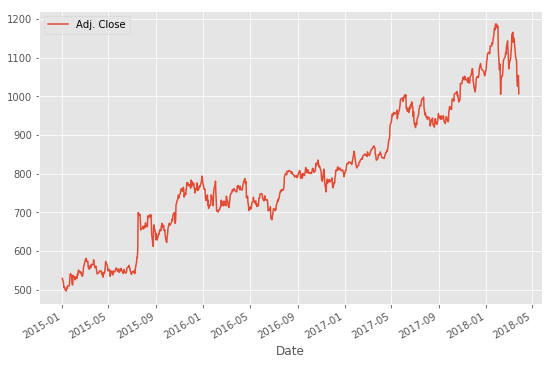

In [20]:
# plot the adjusted closing price
google[['Adj. Close']].plot(figsize=(9,6), grid= True)

# show the plot
plt.show()

### Daily Returns

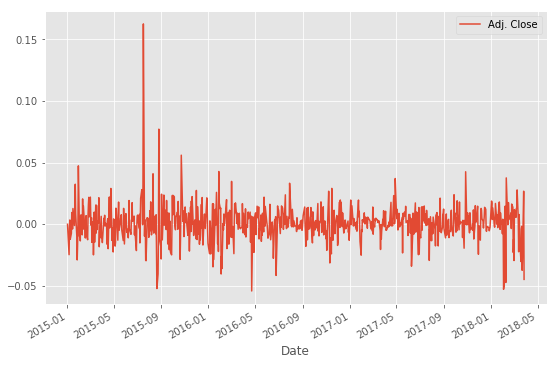

In [21]:
# plot the daily percentage change
daily_pct_change.plot(figsize=(9,6), grid= True)

# show the plot
plt.show()

### Daily Log Returns

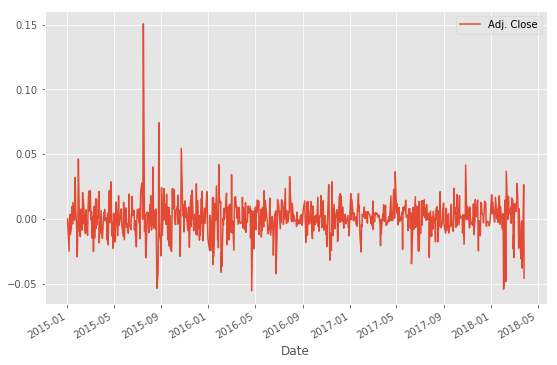

In [22]:
# daily log returns
daily_log_returns = np.log(daily_pct_change+1)

# plot the closing price
daily_log_returns.plot(figsize=(9,6), grid= True)

# show the plot
plt.show()

### Histogram of Daily Returns

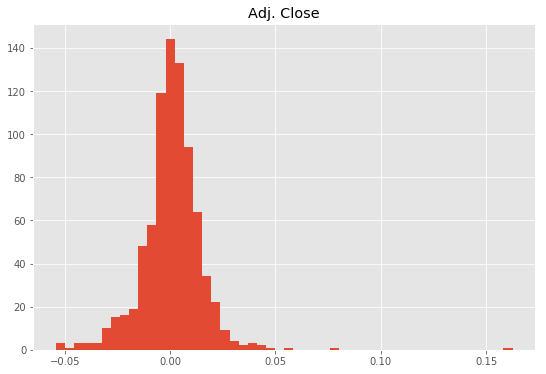

,Adj. Close
count,813.000000
mean,0.000893
std,0.014414
min,-0.054141
25%,-0.005371
50%,0.001251
75%,0.007732
max,0.162584


In [23]:
# plot the distribution of `daily_pct_c`
ax = daily_pct_change.hist(figsize=(9,6), bins=50)

# show the plot
plt.show()

# pull up summary statistics
daily_pct_change.describe()

### Cumulative Daily Returns

In [24]:
# calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_change).cumprod()

# print head of `cum_daily_return`
cum_daily_return.head()

,Adj. Close
Date,
2015-01-02,1.000000
2015-01-05,0.980946
2015-01-06,0.956737
2015-01-07,0.953923
2015-01-08,0.957247


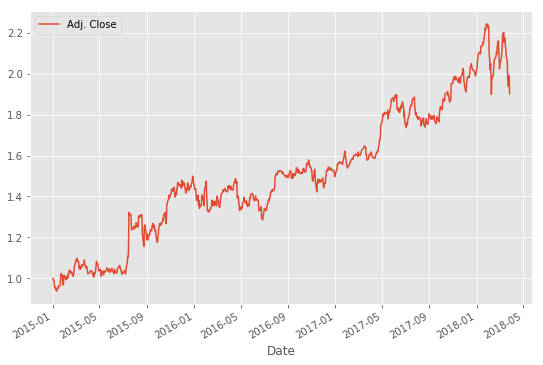

In [25]:
# plot the cumulative daily returns
cum_daily_return.plot(figsize=(9,6))

# show the plot
plt.show()

## Univariate Time Series Forecasting

### ARIMA(p, d, q) Model

A widely used model to forecast time series is ARIMA(p, d, q) model. In this model, 
* ***p*** is the number of autoregressive terms of the dependent variable
* ***d*** is the number of nonseasonal differences needed to achieve stationarity
* ***q*** is the number of lagged forecast errors.

Assumptions:
1. Stationarity

    The time series needs to be stationary (constant variance and mean) in order to be able to produce forecasts. The main reason of non-stationarity is the series being a **Random Walk (RW)** (with drift or without drift).
    
    A Random Walk with drift can be defined as follows:

    Today's Price = mean + Yesterday's Price + Noise

    $$P_t= μ + P_{t-1} + ε_t$$

    In a Random Walk with drift, the change in price is the drift + white noise.

    The **Augmented Dickey-Fuller (ADF)** test assesses whether the series is a random walk or not:

    $$P_t - P_{t-1}= α + β*P_{t-1} + ε_t$$

    $H0: β = 0$ (random walk)

    $H1: β <0$ (not random walk) 

    If p-value < 0.05 => reject H0.
    
It is good practice to prepare transform the data using square roots or logarithms to stabilize the variance. And then difference the data if the series is not stationary to remove remaining seasonality or other trends.

### Is our Series Stationary?

In [26]:
# Augmented Dickey-Fuller (ADF) non-stationarity test
result = adfuller(daily_log_returns['Adj. Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -25.897034
p-value: 0.000000


We can reject the null hypothesis at the 5% level, meaning that the series seems to be stationary.

### What are the causes of non-stationarity and how can it be fixed?

Because the ARIMA model predict the dependent variable using its own lags as predictors, the predictors need to be uncorrelated and independent of each other.

* **Strong stationarity**: the entire distribution of data is time-invariant.
* **Weak stationarity**: mean, variance and autocorrelation are time-invariant.

If parameters vary with time, there would be too many parameters to estimate. We can only estimate a parsimonious model with a few parameters.

Examples of non-stationary series:
* random walk
* seasonality in series
* change in mean or standard deviation over time

Stationarity can be achieved via differencing. The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quickly.

### Graphical Assessment of Stationarity

Text(0.5, 1.0, 'Google Returns')

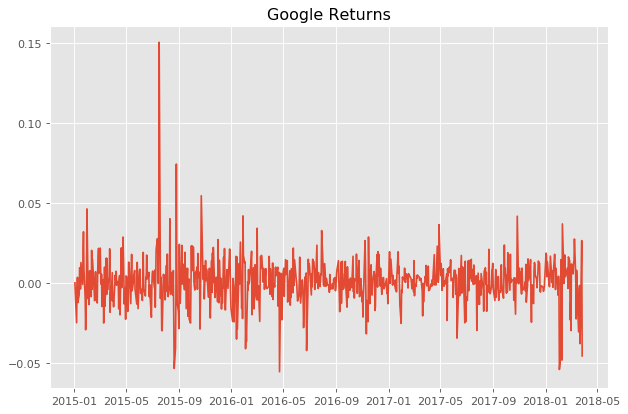

In [27]:
# set parameters
plt.rcParams.update({'figure.figsize':(9,6), 'figure.dpi':80})

# plot google log returns
plt.plot(daily_log_returns['Adj. Close'])
plt.title('Google Returns')

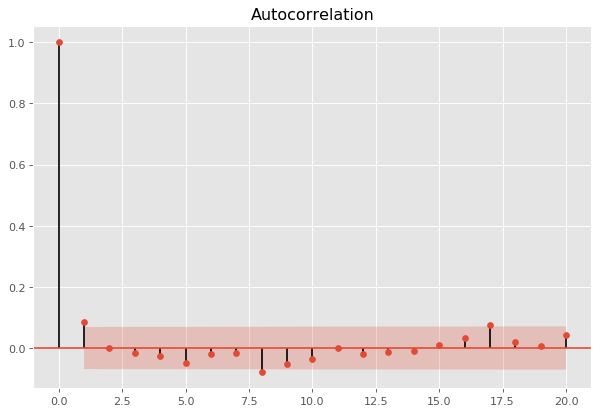

In [28]:
# set parameters
plt.rcParams.update({'figure.figsize':(9,6), 'figure.dpi':80})

# plot acf of log returns
plot_acf(daily_log_returns['Adj. Close'], alpha = 0.05, lags = 20);

It can be seen here that the log returns exhibit a flat behaviour and the autocorrelation plot seems to indicate that the log returns are not correlated with their lags, except maybe the first one. 

### What are the "right" parameters for the ARIMA Model?

There are three techniques to determine the "right" order:
* **Partial Autocorrelation Function (PACF)**
    It sort of eliminates the influence from the intermediate lags.

* **Information Criteria**
    AIC or BIC.

* **Grid Search**

#### PACF

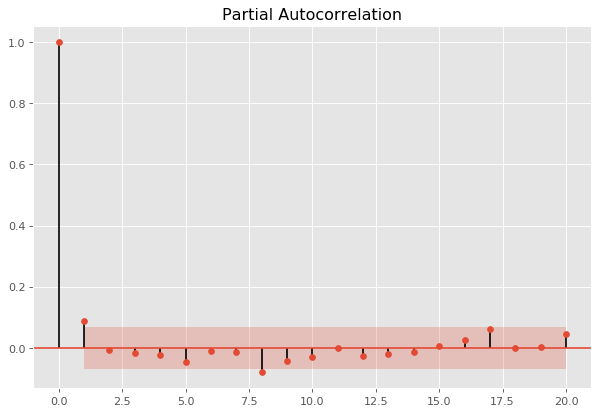

In [29]:
# plot PACF
plot_pacf(daily_log_returns['Adj. Close'], lags = 20);

Here it seems to suggest we should use only one lag (only one is significant). 

#### Information Criterion (BIC)

Text(0.5, 0, 'Order of AR')

Text(0, 0.5, 'Bayesian Information Criterion')

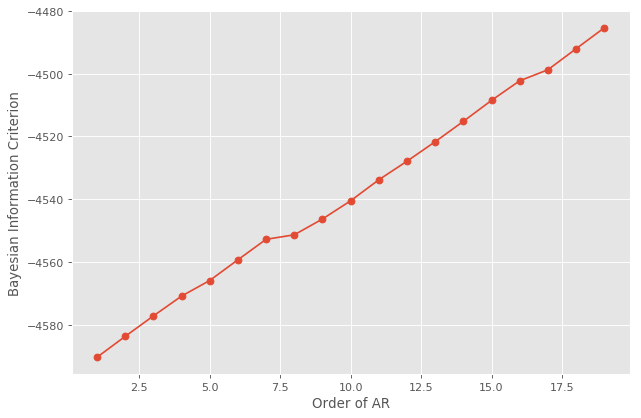

In [30]:
# create a vector of zeros
BIC = np.zeros(20)

# produce model with 20 different orders and store BICs
for p in range(20):
    mod = ARIMA(daily_log_returns['Adj. Close'], order = (p, 0, 0))
    res = mod.fit()
    
    # store BIC result
    BIC[p] = res.bic

# plot BICs
plt.plot(range(1,20), BIC[1:20], marker = 'o')

# xlabel
plt.xlabel('Order of AR')

# ylabel
plt.ylabel('Bayesian Information Criterion')

# show
plt.show()

Same conclusion using BIC.

#### Grid Search

In [31]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [38]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [40]:
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(daily_log_returns['Adj. Close'], p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=0.000
ARIMA(0, 0, 1) MSE=0.000
ARIMA(0, 0, 2) MSE=0.000
ARIMA(0, 1, 0) MSE=0.000
ARIMA(0, 1, 1) MSE=0.000
ARIMA(0, 1, 2) MSE=0.000
ARIMA(0, 2, 0) MSE=0.001
ARIMA(0, 2, 1) MSE=0.000
ARIMA(1, 0, 0) MSE=0.000
ARIMA(1, 0, 1) MSE=0.000
ARIMA(1, 1, 0) MSE=0.000
ARIMA(1, 2, 0) MSE=0.001
ARIMA(2, 0, 0) MSE=0.000
ARIMA(2, 1, 0) MSE=0.000
ARIMA(2, 2, 0) MSE=0.000
ARIMA(4, 0, 0) MSE=0.000
ARIMA(4, 1, 0) MSE=0.000
ARIMA(4, 1, 1) MSE=0.000
ARIMA(4, 2, 0) MSE=0.000
ARIMA(6, 0, 0) MSE=0.000
ARIMA(6, 1, 0) MSE=0.000
ARIMA(6, 2, 0) MSE=0.000
ARIMA(8, 0, 0) MSE=0.000
ARIMA(8, 1, 0) MSE=0.000
ARIMA(8, 1, 1) MSE=0.000
ARIMA(8, 2, 0) MSE=0.000
ARIMA(10, 0, 0) MSE=0.000
Best ARIMA(0, 0, 1) MSE=0.000


### GARCH(p, q) Model

The variance of a time series can be heteroskedastic (dissimilar at different point in time), and conditional on the variance of the x last time periods.

Conditionally heteroskedastic time series are then by nature non-stationary.

This variance can be modelled via an autoregresssive process.


#### What is the procedure to fit a GARCH model?

1. Iterate through combinations of ARIMA(p, d, q) models to best fit our time series.
2. Pick the GARCH model orders according to the ARIMA model with lowest AIC.
3. Fit the GARCH(p, q) model to our time series.
4. Examine the model residuals and squared residuals for autocorrelation

#### Find best ARIMA(p, d, q) model

In [44]:
def _get_best_model(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None
    pq_rng = range(5) # [0,1,2,3,4]
    d_rng = range(2) # [0,1]
    for i in pq_rng:
        for d in d_rng:
            for j in pq_rng:
                try:
                    tmp_mdl = smt.ARIMA(TS, order=(i,d,j)).fit(
                        method='mle', trend='nc'
                    )
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d, j)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: {:6.2f} | order: {}'.format(best_aic, best_order))                    
    return best_aic, best_order, best_mdl

In [ ]:
res_tup = _get_best_model(daily_log_returns['Adj. Close'])

order = res_tup[1]
model = res_tup[2]

#### Assess residuals

In [ ]:
tsplot(model.resid, lags=30)

In [ ]:
tsplot(model.resid**2, lags=30)

#### Fit GARCH model

In [ ]:
p_ = order[0]
o_ = order[1]
q_ = order[2]

am = arch_model(model.resid, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
print(res.summary())

#### Plot residuals again

In [ ]:
tsplot(res.resid, lags=30)

In [ ]:
tsplot(res.resid**2, lags=30)

In [ ]:
####  work in progress #####